In [2]:
# load libraries

import glob
import os
import pandas as pd
import numpy as np
import nltk
from nltk import word_tokenize
import string
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# let's have a look at the files

path = r'C:\Users\sonja tilly.ABERDEEN\text_docs\*'

files = glob.glob(path)

files[0:10]

['C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aberdeen.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Alliance Bernstein.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Allianz.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Amundi.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Aviva.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\AXA.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\Barclays.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlackRock.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BlueBay.txt',
 'C:\\Users\\sonja tilly.ABERDEEN\\text_docs\\BNP Paribas.txt']

In [4]:
# let's read in the files and append to a list of lists

list_of_lists = []

for file in files:
    text_file = open(file)
    lines = text_file.readlines()
    list_of_lists.append(lines)
    text_file.close()

In [5]:
list_of_lists[0][:5]

['Aberdeen\n',
 'Economic Outlook – January 2018\n',
 'Monthly highlights: Global economic strength to continue in 2018\n',
 'The global economy showed no sign of losing any momentum\n',
 'in 2017 Q4 and is heading into 2018 in a healthy state. We have\n']

In [6]:
# extract list of file company names

list_of_names = []

for f in files:
    head, tail = os.path.split(f)
    name = os.path.splitext(os.path.basename(tail))[0]
    list_of_names.append(name)
    
print('Number of documents:', len(list_of_names))
print(' ')
print(list_of_names)

Number of documents: 61
 
['Aberdeen', 'Alliance Bernstein', 'Allianz', 'Amundi', 'Aviva', 'AXA', 'Barclays', 'BlackRock', 'BlueBay', 'BNP Paribas', 'Candriam', 'Capital Economics', 'Citi', 'ClearBridge', 'Credit Suisse', 'Danske Bank', 'Deutsche Bank', 'Eastspring', 'Fidelity', 'Fisher Investments', 'Franklin Templeton', 'GAM', 'Goldman Sachs', 'Hermes', 'HSBC', 'ING', 'Invesco', 'Investec', 'JanusHenderson', 'JOHCM', 'JPM', 'Kames Capital', 'Legg Mason', 'Liontrust', 'Lloyds Bank', 'Loomis Sayles', 'Macquarie', 'MAN GLG', 'MandG', 'Mirabaud', 'Morgan Stanley', 'Muzinich', 'Neptune', 'Neuberger Berman', 'Nordea', 'Pictet', 'Pimco', 'RLAM', 'Robeco', 'Sanlam', 'Schroders', 'SEB', 'Smith&Williamson', 'Standard Life', 'T Rowe Price', 'Threadneedle', 'UBP', 'UBS', 'Unicredit', 'Vanguard', 'Wellington']


In [7]:
# load nltk's English stopwords as 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
more_stopwords = ['and', 'to', 'the', 'we', 'of', 'in', 'are', 'on', 'stephan',
                 'year', 'investment', 'investor', 'portfolio', 'analyst', 'q',
                 'manager', 'outlook', 'fund', 'economy', 'market', 'bank']
stopwords.extend(more_stopwords)
print(stopwords[0:10])

# create tokenizer that picks out sequences of alphanumeric characters as tokens and drops everything else
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from nltk import pos_tag

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [8]:
# tidy up list of lists

def tidy_up(temp0):
    temp1 = [[t.lower() for t in l] for l in temp0]
    temp2 = [[t.replace('\n','') for t in l] for l in temp1]
    temp3 = [[t.replace('\r','') for t in l] for l in temp2]
    temp4 = [[pos_tag(tokenizer.tokenize(t)) for t in l] for l in temp3]
    return temp4

In [9]:
# create function to create list of sentences

def raw_text(lol):
    temp = []
    for i in lol:
        sent = " ".join(str(item) for item in i)
        temp.append(sent)
    return temp

In [10]:
tokens = tidy_up(list_of_lists)

tokens[0][1]

[('economic', 'JJ'), ('outlook', 'NN'), ('january', 'NN'), ('2018', 'CD')]

In [11]:
# extract nouns

from nltk import pos_tag

nouns = []

for t in tokens:
    tmp = []
    for l in t:
        for token, pos in l:
            if pos.startswith('N'):
                tmp.append(token)
            
    nouns.append(tmp) 



In [12]:
nouns[0][0:10]

['aberdeen',
 'outlook',
 'january',
 'highlights',
 'strength',
 'economy',
 'sign',
 'momentum',
 'q4',
 'state']

In [13]:
# load nltk's Lemmatizer

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()    

In [14]:
# lemmatize tokens

lems = []

for lst in nouns:
    temp = []
    for l in lst:
        st = wordnet_lemmatizer.lemmatize(l)
        temp.append(st)
    lems.append(temp) 

In [15]:
lems[0][0:10]

['aberdeen',
 'outlook',
 'january',
 'highlight',
 'strength',
 'economy',
 'sign',
 'momentum',
 'q4',
 'state']

In [16]:
lems_sent = raw_text(lems)


In [17]:
# remove stopwords from stems

clean_lems = [[i for i in l.split() if i not in stopwords] for l in lems_sent]
clean_lems[0][0:10]


['aberdeen',
 'january',
 'highlight',
 'strength',
 'sign',
 'momentum',
 'q4',
 'state',
 'forecast',
 'growth']

In [18]:
corpus = raw_text(clean_lems)
corpus[0][0:200]

'aberdeen january highlight strength sign momentum q4 state forecast growth percentage point purchasing index pmi level month trade prospect commodity price manufacturer commodity producer growth whole'

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

# try Word Frequencies with TfidfVectorizer

def tfidf_vectorizer(text):
          
    # create the transform
    vectorizer = TfidfVectorizer()    
        
    # fit and encode text
    vector = vectorizer.fit_transform(text)

    # summarize encoded vector
    #print(vector.shape)
    array = vector.toarray()
        
    return array

In [20]:
text_array = tfidf_vectorizer(corpus)

# Reduce data to 2 dimensions

In [21]:
# reduce dimensions with MDS

from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=47)

red = mds.fit_transform(text_array)  # shape (n_components, n_samples)

red_df = pd.DataFrame(red, columns=['X','Y'])


In [22]:
red_df.head()

,X,Y
0,-0.776667,0.133396
1,-0.208623,-0.298884
2,0.459848,0.586149
3,0.193588,-0.304382
4,0.336422,-0.778142


In [23]:
# set up kmeans algorithm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

def clusterKMeans(k):
    clusterer = KMeans(n_clusters=k, random_state=47).fit(red_df)
    centroids = clusterer.cluster_centers_
    labels = clusterer.labels_
    score = silhouette_score(red_df, clusterer.labels_, metric='euclidean')
    samples_score = silhouette_samples(red_df, clusterer.labels_, metric='euclidean')
    return centroids, labels, score, samples_score

for i in range(2,8):
    centroids, labels, score, samples_score = clusterKMeans(i)
    print("The silhouette score for "+ str(i) + " clusters is: {:.3}.".format(score))

The silhouette score for 2 clusters is: 0.323.
The silhouette score for 3 clusters is: 0.348.
The silhouette score for 4 clusters is: 0.327.
The silhouette score for 5 clusters is: 0.298.
The silhouette score for 6 clusters is: 0.326.
The silhouette score for 7 clusters is: 0.32.


In [24]:
# edit number of clusters

for i in range(3,4):
    centroids, labels, score, samples_score = clusterKMeans(i)
    
red_df['Cluster'] = labels

red_df["Names"] = list_of_names

red_df.head()


,X,Y,Cluster,Names
0,-0.776667,0.133396,1,Aberdeen
1,-0.208623,-0.298884,1,Alliance Bernstein
2,0.459848,0.586149,2,Allianz
3,0.193588,-0.304382,0,Amundi
4,0.336422,-0.778142,0,Aviva


In [25]:
#add centroid coordinates for each cluster

centroidsx = {0:centroids[0:1,0], 1:centroids[1:2, 0], 2:centroids[2:3, 0], 3:centroids[3:4, 0],
             4:centroids[4:5, 0], 5:centroids[5:6, 0], 6:centroids[6:7, 0]}

centroidsy = {0:centroids[0:1,1], 1:centroids[1:2, 1], 2:centroids[2:3, 1], 3:centroids[3:4, 1],
             4:centroids[4:5, 1], 5:centroids[5:6, 1], 6:centroids[6:7, 1]}

red_df['Centroidx'] = red_df['Cluster'].map(centroidsx)

red_df['Centroidy'] = red_df['Cluster'].map(centroidsy)

red_df.tail()


,X,Y,Cluster,Names,Centroidx,Centroidy
56,-0.972789,-0.133554,1,UBP,[-0.473713125759],[-0.407187255438]
57,-0.945987,-0.357000,1,UBS,[-0.473713125759],[-0.407187255438]
58,-0.048574,-0.153972,1,Unicredit,[-0.473713125759],[-0.407187255438]
59,-0.118543,0.266555,2,Vanguard,[-0.0976026513785],[0.588318936364]
60,0.678507,0.042474,0,Wellington,[0.576195909706],[-0.210547627744]


In [26]:
#set colours

colour_dict = {0:'magenta', 1:'cyan', 2:'limegreen', 3:'navy', 4:'gold', 5:'darkorange', 6:'purple', 7:'indigo'}
red_df['Colour'] = red_df['Cluster'].map(colour_dict)

red_df.sort_values('Cluster').iloc[0:2]

,X,Y,Cluster,Names,Centroidx,Centroidy,Colour
60,0.678507,0.042474,0,Wellington,[0.576195909706],[-0.210547627744],magenta
32,0.591229,0.390378,0,Legg Mason,[0.576195909706],[-0.210547627744],magenta


In [27]:
# build clusters
# add all strings to dataframe, then add up words if in same cluster

stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']
chars = [''.join([char for char in l if char not in stuff]) for l in corpus]
wrds = pd.DataFrame(chars, columns = ['Words'])

wrds['Cluster'] = red_df['Cluster']
wrds.sort_values('Cluster').head()

,Words,Cluster
60,wellington something punch bowl fundamental va...,0
32,legg mason resolution gain asset class momentu...,0
35,loomis sayles sector team globe opportunity tr...,0
39,mirabaud review equity fact volatility low ass...,0
20,franklin templeton macro yield risk number fac...,0


In [28]:
# build clusters continued

cluster_0 = []
cluster_1 = []
cluster_2 = []
cluster_3 = []
cluster_4 = []
cluster_5 = []
cluster_6 = []


for row in wrds['Cluster']:
    if row == 0:
        cluster_0.append(wrds['Words'][wrds['Cluster']==0])
    elif row == 1:
        cluster_1.append(wrds['Words'][wrds['Cluster']==1])
    elif row == 2:
        cluster_2.append(wrds['Words'][wrds['Cluster']==2])
    elif row == 3:
        cluster_3.append(wrds['Words'][wrds['Cluster']==3])
    elif row == 4:
        cluster_4.append(wrds['Words'][wrds['Cluster']==4])
    elif row == 5:
        cluster_5.append(wrds['Words'][wrds['Cluster']==5])
    else:
        cluster_6.append(wrds['Words'][wrds['Cluster']==6])

In [29]:
cluster_0[0]


3     amundi risk rotation reduction men mind event ...
4     aviva theme risk theme point policy sight outc...
7     blackrock prospect inflation sustainability vo...
9     bnp paribas tide policy measure combination ac...
10    candriam trend growth conviction visibility po...
11    capital economics economics update recovery sy...
12    citi bull contributor head strategy multi chan...
18    fidelity growth volatility key takeaway expans...
20    franklin templeton macro yield risk number fac...
31    kames capital commentator weighting equity wor...
32    legg mason resolution gain asset class momentu...
35    loomis sayles sector team globe opportunity tr...
39    mirabaud review equity fact volatility low ass...
40    morgan sync gdp pace europe asset price enthus...
41    muzinich credit continuum end draw attention c...
43    neuberger berman ten macro inflection point ne...
45    pictet growth wherever reason spirit thing lan...
48    robeco time time half porridge goldilocks 

# Find most frequent words per cluster

In [41]:
# find most frequent words in each cluster

import operator

# edit number of clusters

texts = [cluster_0, cluster_1, cluster_2]

def most_frequent_words(cluster):
    vectorizer = TfidfVectorizer()    
    
    X = vectorizer.fit_transform(cluster)    
      
    array = X.toarray()
    
    freq = np.ravel(array.sum(axis=0)) # sum each columns to get total counts for each word
    
    
    # get vocabulary keys, sorted by value

    vocab = [v[0] for v in sorted(vectorizer.vocabulary_.items(), key=operator.itemgetter(1))]
    fdist = dict(zip(vocab, freq)) # return same format as nltk
    fdist_sorted = sorted(fdist, key=fdist.get, reverse=True)[:5]
    return fdist_sorted

In [42]:
fdist_sorted_0 = most_frequent_words(raw_text(cluster_0))
fdist_sorted_0

['growth', 'rate', 'inflation', 'risk', 'equity']

In [43]:
freq_words = []

for t in texts:
    freq = most_frequent_words(raw_text(t))
    freq_words.append(freq)

In [44]:
cl = raw_text(freq_words)
clu = pd.DataFrame(cl, columns=['Words'])
clu['Cluster'] = range(0, len(texts))

clu['Centroid_x'] = clu['Cluster'].map(centroidsx)
clu['Centroid_y'] = clu['Cluster'].map(centroidsy)

clu

,Words,Cluster,Centroid_x,Centroid_y
0,growth rate inflation risk equity,0,[0.576195909706],[-0.210547627744]
1,growth rate inflation policy risk,1,[-0.473713125759],[-0.407187255438]
2,growth rate inflation risk bond,2,[-0.0976026513785],[0.588318936364]


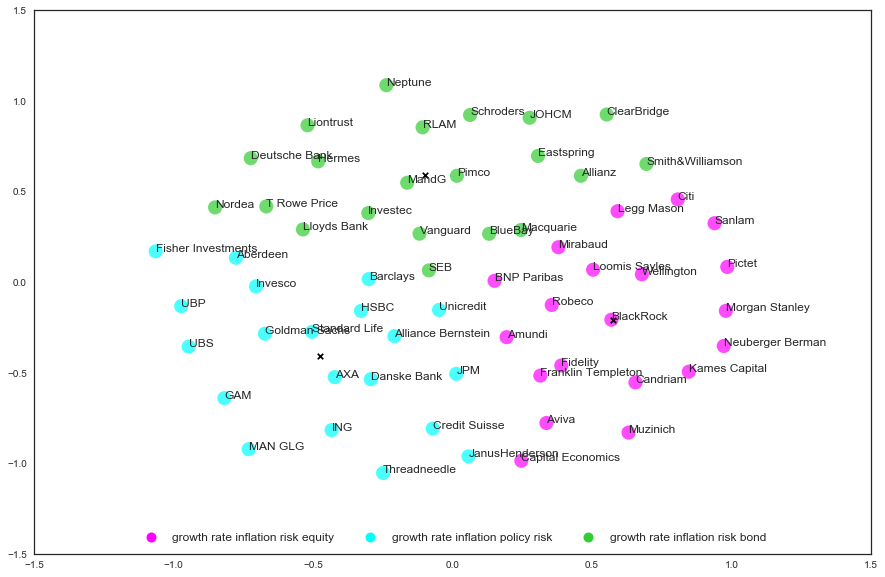

In [45]:
# visualise results

fig = plt.figure(figsize=(15,10))

sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.scatter(red_df['X'], red_df['Y'], c=red_df['Colour'], marker='o', s=200,
            edgecolors='none', alpha=0.7,label='')
ax2.scatter(clu['Centroid_x'], clu['Centroid_y'], s=30, c='k', marker="x", label=clu['Words'])

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import matplotlib.lines as mlines

line0 = mlines.Line2D([], [], color='magenta', marker='o', markersize=10, linestyle='None',label='')
line1 = mlines.Line2D([], [], color='cyan', marker='o', markersize=10, linestyle='None',label='')
line2 = mlines.Line2D([], [], color='limegreen', marker='o', markersize=10, linestyle='None', label='')
#line3 = mlines.Line2D([], [], color='navy', marker='o', markersize=10, linestyle='None', label='')
#line4 = mlines.Line2D([], [], color='gold', marker='o', markersize=10, linestyle='None', label='')
#line5 = mlines.Line2D([], [], color='darkorange', marker='o', markersize=10, linestyle='None', label='')
#line6 = mlines.Line2D([], [], color='purple', marker='o', markersize=10, linestyle='None', label='')

ax2.legend([line0, line1, line2],[c for c in clu['Words']],
         loc = 'lower center', ncol=3, labelspacing=0.5, fontsize=12)

for i in range(len(red_df)):
    ax1.text(red_df.ix[i]['X'], red_df.ix[i]['Y'], red_df.ix[i]['Names'], size=12)  

# LDA topic modelling

magenta: growth  rate  risk  inflation  equity  bond  policy  asset  credit  yield

cyan: growth  rate  price  risk  bond  equity  sector  term  yield  policy

limegreen: growth  rate  inflation  price  policy  risk  q  term  wage  interest


In [47]:
# prepare clusters for Latent Dirichlet Allocation

def prep_cluster(text):
    t = [[i for i in ls.split()] for ls in text[0]]
    return t


In [48]:
# edit number of clusters

cl_0 = prep_cluster(cluster_0)
cl_1 = prep_cluster(cluster_1)
cl_2 = prep_cluster(cluster_2)
#cl_3 = prep_cluster(cluster_3)
#cl_4 = prep_cluster(cluster_4)
#cl_5 = prep_cluster(cluster_5)
#cl_6 = prep_cluster(cluster_6)

In [49]:
# edit number of clusters

clusters = [cl_0, cl_1, cl_2]
#cl_3, cl_4, cl_5, cl_6

In [50]:
# use Latent Dirichlet Allocation for topic modelling

from gensim import corpora, models 

def lda_model(words):
    for c in clusters:
        dictionary = corpora.Dictionary(c)
        corpus_lda = [dictionary.doc2bow(text) for text in c] 
        lda = models.LdaModel(corpus_lda, num_topics=1,  
                                id2word=dictionary) 
        topics_matrix = lda.show_topics(formatted=True, num_words=10)
        raw = raw_text(topics_matrix)
        stuff = ["'", "+", '1', '2', '3', '4', '5', '6', '7', '8', '9', '0', '*', '.', '"', ',']
        chars = [''.join([char for char in l if char not in stuff]) for l in raw]
        topics = pd.DataFrame(chars, columns = ['Words'])
        for w in topics.Words:
            print(w)
    return 

C:\Users\sonja tilly.ABERDEEN\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\gensim\utils.py:865: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Using TensorFlow backend.


In [62]:
lda_model(clusters)


 growth  rate  inflation  risk  equity  bond  policy  yield  asset  credit
 growth  rate  inflation  policy  risk  price  level  term  asset  equity
 growth  rate  inflation  risk  bond  policy  price  yield  term  stock


In [63]:
red_df.groupby(by='Colour', axis=0).mean()

,X,Y,Cluster
Colour,,,
cyan,-0.473713,-0.407187,1
limegreen,-0.097603,0.588319,2
magenta,0.576196,-0.210548,0


# LDA topic modelling

magenta:  growth  rate  inflation  risk  equity  bond  policy  yield  asset  credit

cyan:  growth  rate  inflation  policy  risk  price  level  term  asset  equity

limegreen: growth  rate  inflation  risk  bond  policy  price  yield  term  stock


In [64]:
# generate ngrams

from nltk.util import ngrams
from collections import Counter

In [65]:
def ngram_counter(cluster):
    counts = Counter()
    for sent in cluster:
        counts.update(" ".join(n) for n in nltk.ngrams(sent, 2))
    #print(counts.most_common(3))
    #print(' ')
    return counts.most_common(5)

In [66]:
grams = []
for c in clusters:
    
    #print('Cluster',  clusters.index(c), ':')
    g = ngram_counter(c)
    grams.append(g)


In [67]:
grams

[[('interest rate', 92),
  ('bond yield', 35),
  ('earnings growth', 35),
  ('balance sheet', 29),
  ('risk asset', 27)],
 [('interest rate', 106),
  ('balance sheet', 53),
  ('rate hike', 45),
  ('tax cut', 44),
  ('growth rate', 42)],
 [('interest rate', 142),
  ('balance sheet', 54),
  ('bond yield', 41),
  ('government bond', 40),
  ('rate hike', 38)]]

In [68]:
top_grams = []

for g in grams:
    for m in g:
        top_grams.append(m[0])
    

In [69]:
top_grams

['interest rate',
 'bond yield',
 'earnings growth',
 'balance sheet',
 'risk asset',
 'interest rate',
 'balance sheet',
 'rate hike',
 'tax cut',
 'growth rate',
 'interest rate',
 'balance sheet',
 'bond yield',
 'government bond',
 'rate hike']

In [59]:
# edit number of clusters

clu['top_grams'] = [top_grams[0:5], top_grams[5:10], top_grams[10:15]]

In [60]:
clu

,Words,Cluster,Centroid_x,Centroid_y,top_grams
0,growth rate inflation risk equity,0,[0.576195909706],[-0.210547627744],"[interest rate, bond yield, earnings growth, b..."
1,growth rate inflation policy risk,1,[-0.473713125759],[-0.407187255438],"[interest rate, balance sheet, rate hike, tax ..."
2,growth rate inflation risk bond,2,[-0.0976026513785],[0.588318936364],"[interest rate, balance sheet, bond yield, gov..."


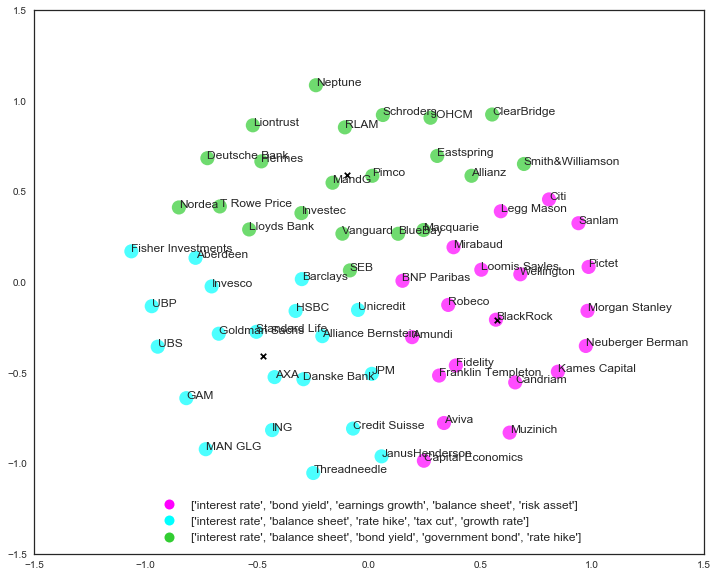

In [61]:
# visualise results with n_grams

fig = plt.figure(figsize=(12,10))

sns.set_style("white")
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.rcParams.update({'font.size': 12})
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)

ax1.scatter(red_df['X'], red_df['Y'], c=red_df['Colour'], marker='o', s=200,
            edgecolors='none', alpha=0.7,label='')
ax2.scatter(clu['Centroid_x'], clu['Centroid_y'], s=30, c='k', marker="x", label=clu['top_grams'])

import matplotlib.patches as mpatches
from matplotlib.legend_handler import HandlerPatch
import matplotlib.lines as mlines

line0 = mlines.Line2D([], [], color='magenta', marker='o', markersize=10, linestyle='None',label='')
line1 = mlines.Line2D([], [], color='cyan', marker='o', markersize=10, linestyle='None',label='')
line2 = mlines.Line2D([], [], color='limegreen', marker='o', markersize=10, linestyle='None', label='')
line3 = mlines.Line2D([], [], color='navy', marker='o', markersize=10, linestyle='None', label='')
line4 = mlines.Line2D([], [], color='gold', marker='o', markersize=10, linestyle='None', label='')
line5 = mlines.Line2D([], [], color='darkorange', marker='o', markersize=10, linestyle='None', label='')
line6 = mlines.Line2D([], [], color='purple', marker='o', markersize=10, linestyle='None', label='')

ax2.legend([line0, line1, line2, line3, line4, line5, line6],[c for c in clu['top_grams']],
         loc = 'lower center', ncol=1, labelspacing=0.5, fontsize=12)

for i in range(len(red_df)):
    ax1.text(red_df.ix[i]['X'], red_df.ix[i]['Y'], red_df.ix[i]['Names'], size=12)  